<a href="https://colab.research.google.com/github/hema22mh1a4244/dllab/blob/main/exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


In [4]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4968 - loss: 471.7534 - val_accuracy: 0.4964 - val_loss: 1.8803
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4966 - loss: 20.5962 - val_accuracy: 0.5042 - val_loss: 0.6973
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5038 - loss: 3.6135 - val_accuracy: 0.4970 - val_loss: 0.7003
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4999 - loss: 1.9045 - val_accuracy: 0.5018 - val_loss: 0.6949
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4982 - loss: 1.5240 - val_accuracy: 0.5009 - val_loss: 0.6978
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5051 - loss: 1.0731 - val_accuracy: 0.5010 - val_loss: 0.6948
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5012 - loss: 0.9750 - val_accuracy: 0.5004 - val_loss: 0.6934
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4945 - loss: 0.8937 - val_accuracy:

In [7]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 50.02%


In [8]:
from sklearn.metrics import classification_report
y_pred = (model.predict(X_test) > 0.5).astype("int32")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

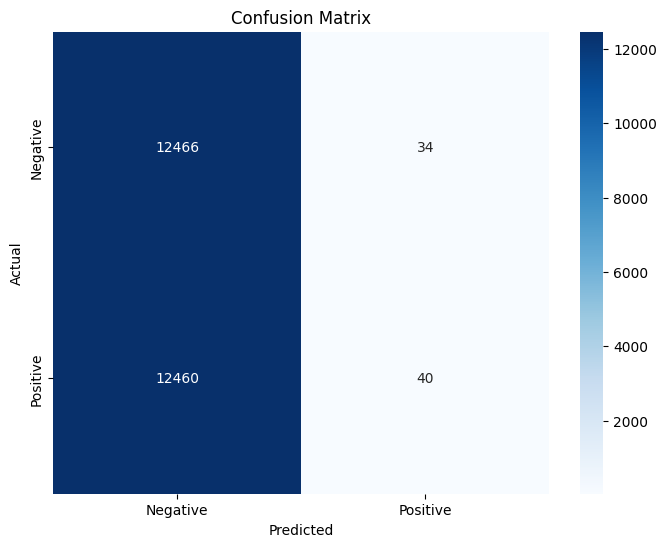

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"],
yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()